<a href="https://colab.research.google.com/github/Hamerson-jhoel/S-Sistemas-2025-1/blob/main/Serie_Fourier0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios

1. Presente una simulación relacionada con la proyección lineal de $\mathbf{a}\in\mathbb{R}^2$ sobre $\mathbf{b}\in\mathbb{R}^2$. El código debe permitir al usuario ingresar las componentes de los dos vectores, calcular el factor de escala de la proyección y graficar los vectores de entrada y el proyectado (usar la función [pyplot.arrow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.arrow.html)).

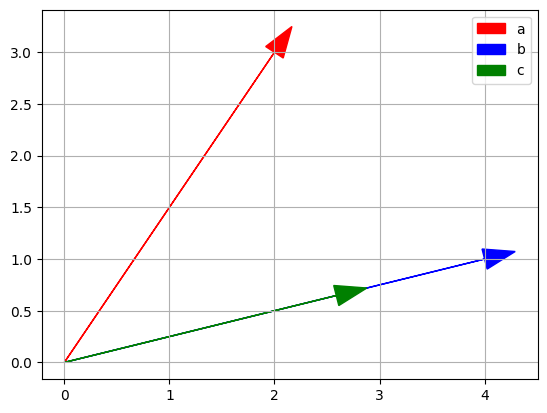

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a= np.array([2,3])
b= np.array([4,1])

lambda_ = np.dot(a,b)/np.dot(b,b)

c = lambda_ * b
plt.arrow(0, 0, a[0], a[1], label='a',head_width=0.2,color='r')
plt.arrow(0, 0, b[0], b[1], label='b',head_width=0.2,color='b')
plt.arrow(0, 0, c[0], c[1], label='c',head_width=0.2,color='g')
#head_width=0.2 para pintar la flecha
plt.grid()
plt.legend()
plt.show()



2. Encontrar la representación por serie exponencial de Fourier de la señal $x(t) = A {\rm{rect}}_{\tau/2}(t)$, con $t\in [-\tau/2,\tau/2]$. Graficar el espectro, la fase del espectro, la reconstrucción para $n\in\{0,\pm1,\pm2,\dots\}$, y determinar el valor del error relativo para cada valor de $n$. Utilice el ambiente animación de Python para mostrar los resultados.

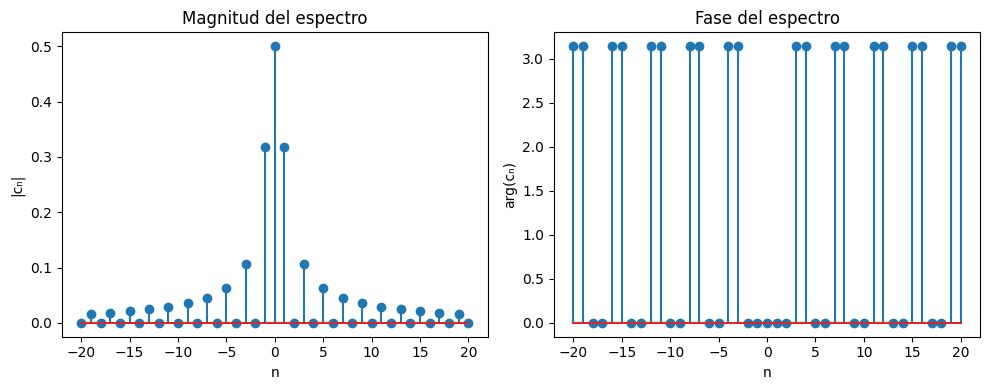

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Parámetros de la señal
A = 1        # Amplitud
tau = 1      # Duración del pulso
T = 2        # Periodo de la señal periódica
w0 = 2 * np.pi / T  # Frecuencia fundamental

# Dominio de tiempo para analizar
t = np.linspace(-T, T, 1000)

# Función rectangular periódica
def rect_pulse(t, tau):
    return np.where(np.abs(t) <= tau/2, 1, 0)

# Señal original (una sola copia periódica)
x_original = A * rect_pulse(np.mod(t + T/2, T) - T/2, tau)

# Coeficientes de Fourier c_n
def cn(n):
    return A * (tau / T) * np.sinc(n * tau / T)

# Reconstrucción de la señal con N armónicos
def x_reconstructed(t, N):
    x_rec = np.zeros_like(t, dtype=np.complex128)  # <- corregido para NumPy 2.0
    for n in range(-N, N+1):
        x_rec += cn(n) * np.exp(1j * n * w0 * t)
    return np.real(x_rec)

# Valores de n
N_max = 20
n_vals = np.arange(-N_max, N_max+1)
cn_vals = np.array([cn(n) for n in n_vals])

# === GRÁFICA DEL ESPECTRO ===
plt.figure(figsize=(10, 4))

# Magnitud
plt.subplot(1, 2, 1)
plt.stem(n_vals, np.abs(cn_vals))
plt.title("Magnitud del espectro")
plt.xlabel("n")
plt.ylabel("|cₙ|")

# Fase
plt.subplot(1, 2, 2)
plt.stem(n_vals, np.angle(cn_vals))
plt.title("Fase del espectro")
plt.xlabel("n")
plt.ylabel("arg(cₙ)")

plt.tight_layout()
plt.show()

# === ANIMACIÓN DE LA RECONSTRUCCIÓN ===
fig, ax = plt.subplots(figsize=(10, 6))
line1, = ax.plot(t, x_original, label='Original', color='black', linestyle='--')
line2, = ax.plot(t, x_original, label='Reconstrucción', color='blue')
error_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
ax.set_ylim(-0.2, 1.2)
ax.set_title("Reconstrucción con serie de Fourier")
ax.set_xlabel("t")
ax.set_ylabel("x(t)")
ax.legend()

# Función de actualización para la animación
def update(N):
    y = x_reconstructed(t, N)  # Reconstrucción con N armónicos
    line2.set_ydata(y)  # Actualizar la reconstrucción
    error = np.linalg.norm(x_original - y) / np.linalg.norm(x_original)  # Error relativo
    error_text.set_text(f'N = {N}, Error relativo = {error:.4f}')  # Mostrar error
    return line2, error_text

# Crear animación
ani = FuncAnimation(fig, update, frames=range(1, N_max+1), interval=400)

plt.close(fig)

# Mostrar animación como video en HTML
HTML(ani.to_html5_video())


#Ejercicio de clase

Ejercicio: Reconstrucción de una señal triangular mediante la serie de Fourier compleja.

Descripción:
Se analiza una señal periódica x(t) con periodo τ, definida dentro de un periodo como:
    x(t) = (4B/τ) * t + B     para t en [-τ/4, τ/4]
    x(t) = 0                  fuera de [-τ/4, τ/4], pero dentro de [-τ/2, τ/2]

Es decir, la señal está definida en el intervalo [-τ/2, τ/2], pero solo tiene soporte (valor distinto de cero)
en [-τ/4, τ/4].


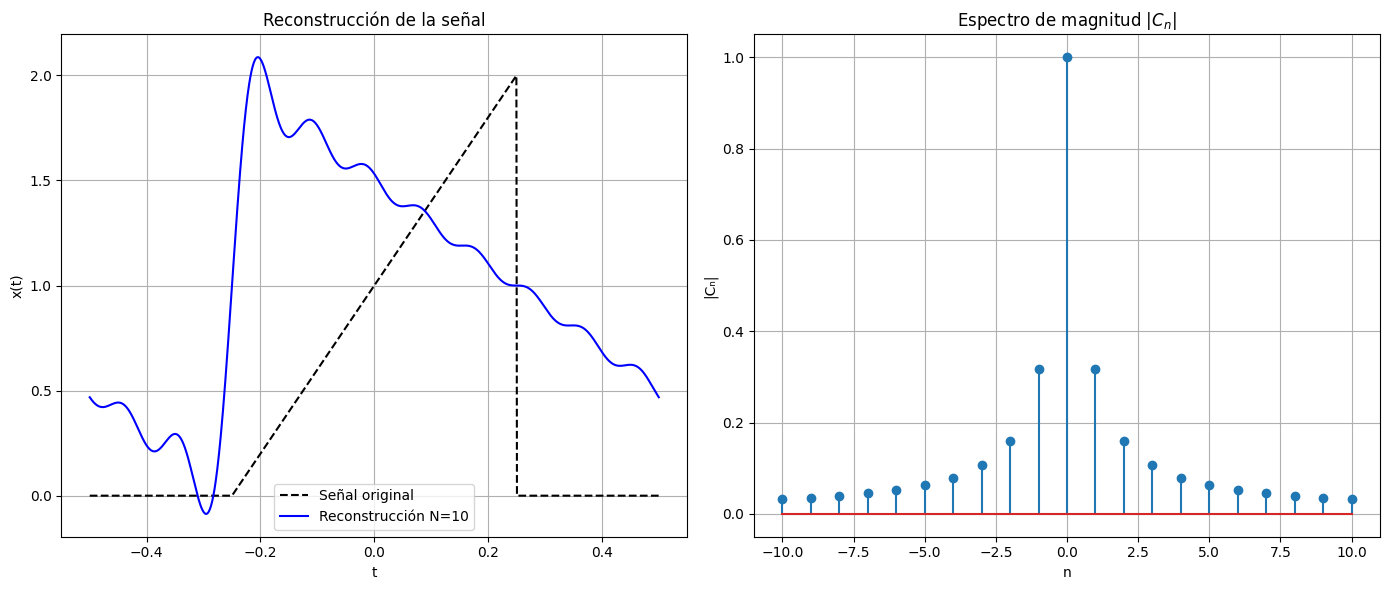

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Parámetros
tau = 1
B = 1
N = 10  # Número total de armónicos (positivos y negativos)
omega_0 = 2 * np.pi / tau
t = np.linspace(-tau/2, tau/2, 1000)

# Señal original triangular en [-tau/4, tau/4]
def x_original(t):
    return (4 * B * t / tau + B) * (np.abs(t) <= tau/4)

# Coeficientes de Fourier Cₙ
def C_n(n):
    if n == 0:
        return B
    return (B / (n * np.pi)) * (np.sin(n * np.pi / 2) - 1j * np.cos(n * np.pi / 2))

# Valores de n y coeficientes
n_vals = np.arange(-N, N + 1)
C_vals = np.array([C_n(n) for n in n_vals])

# Reconstrucción completa para comparación
x_fourier = np.zeros_like(t, dtype=complex)
for i, n in enumerate(n_vals):
    x_fourier += C_vals[i] * np.exp(1j * n * omega_0 * t)

# ---------------- GRÁFICOS ESTÁTICOS ----------------
plt.figure(figsize=(14, 6))

# Señal original y reconstruida
plt.subplot(1, 2, 1)
plt.plot(t, x_original(t), '--', color='black', label='Señal original')
plt.plot(t, x_fourier.real, color='blue', label=f'Reconstrucción N={N}')
plt.title('Reconstrucción de la señal')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid(True)
plt.legend()

# Espectro de magnitud
plt.subplot(1, 2, 2)
plt.stem(n_vals, np.abs(C_vals))
plt.title('Espectro de magnitud $|C_n|$')
plt.xlabel('n')
plt.ylabel('|Cₙ|')
plt.grid(True)

plt.tight_layout()
plt.show()


# ---------------- ANIMACIÓN DE LA RECONSTRUCCIÓN ----------------
fig, ax = plt.subplots(figsize=(10, 5))
line_rec, = ax.plot([], [], label='Reconstrucción', color='blue')
line_orig, = ax.plot(t, x_original(t), '--', color='black', label='Original')
error_text = ax.text(0.02, 0.92, '', transform=ax.transAxes)
ax.set_xlim(-tau/2, tau/2)
ax.set_ylim(-0.2, 2.2)
ax.set_title("Reconstrucción progresiva con Serie de Fourier")
ax.set_xlabel("t")
ax.set_ylabel("x(t)")
ax.grid(True)
ax.legend()

# Inicialización
def init():
    line_rec.set_data([], [])
    error_text.set_text('')
    return line_rec, error_text

# Actualización
def update(frame):
    if frame == 0:
        y = np.zeros_like(t)
    else:
        partial_sum = np.zeros_like(t, dtype=complex)
        for i in range(-frame, frame + 1):
            idx = np.where(n_vals == i)[0][0]  # buscar el índice correspondiente
            partial_sum += C_vals[idx] * np.exp(1j * i * omega_0 * t)
        y = partial_sum.real

    line_rec.set_data(t, y)
    error = np.linalg.norm(x_original(t) - y) / np.linalg.norm(x_original(t))
    error_text.set_text(f'N = {frame}, Error relativo = {error:.4f}')
    return line_rec, error_text

ani = FuncAnimation(fig, update, frames=range(N + 1), init_func=init, blit=True)
plt.close(fig)

# Mostrar animación
HTML(ani.to_jshtml())